# Classification with sklearn's modelers
1. Decision Tree
2. Artificial Neural Network
3. Random Forest

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 1) Import Library
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) read data
iris_dataset = load_iris()

print(iris_dataset.feature_names)
print(iris_dataset.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [33]:
import warnings
# from pythainlp.tokenize import word_tokenize
import pythainlp.util
# from pythainlp.word_vector import *
from sklearn.metrics.pairwise import cosine_similarity  # ใช้หาค่าความคล้ายคลึง
from pythainlp.soundex import lk82, metasound
import numpy as np
from pythainlp import word_tokenize # ทำการเรียกตัวตัดคำ
from pythainlp.word_vector import *
from gensim.models import Word2Vec
warnings.filterwarnings('ignore')
import json

In [18]:
f = open('ThaiQACorpus-DevelopmentDataset.json')
data = json.load(f)
question = []
ans = []
for i in data['data']:
    question.append(i['question'])
    ans.append(i['answer'])


In [21]:
npQuestion = np.array(question)
npAns = np.array(ans)

In [30]:
df = pd.DataFrame(npQuestion, columns = ['Question'])

In [31]:
df['ans'] = npAns

In [34]:
model=get_model() # ดึง model ของ thai2vec มาเก็บไว้ในตัวแปร model
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = pythainlp.word_tokenize(ss)
    vec = np.zeros((1,dim))

    for word in s:
        if word in model.wv.index2word:
            vec+= model.wv.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec


In [129]:
featureQuestion = []
for i in npQuestion:
    featureQuestion.append(sentence_vectorizer(i)[0])
# sentence_vectorizer("ok")

In [130]:
df['feature'] = featureQuestion
df['feature']

0       [-0.0674289228896109, -0.14822653610295114, 0....
1       [-0.061509999579616954, 0.09786247586210568, 0...
2       [-0.06104582730609843, 0.07518426110239132, 0....
3       [-0.0816963526475079, -0.024467882152427647, 0...
4       [-0.1109353310118119, -0.11894792147601645, 0....
                              ...                        
3995    [0.0960086234845221, -0.20693937758915126, 0.1...
3996    [0.11702712791156955, -0.03501412458717823, 0....
3997    [0.0019321399075644357, -0.05554357171058655, ...
3998    [-0.03783447876572609, -0.10074763947632163, 0...
3999    [-0.011951898131519556, -0.09441395068424754, ...
Name: feature, Length: 4000, dtype: object

In [131]:
featureQuestion

[array([-6.74289229e-02, -1.48226536e-01,  7.16896155e-02,  9.39047275e-02,
        -9.63115287e-03,  1.53050394e-02, -6.97319607e-02, -5.68538843e-02,
         1.76770615e-01,  1.17324613e-01, -1.26743731e-01, -2.50750014e-03,
         5.78701930e-02,  2.22176886e-01,  6.06024226e-02, -8.00434220e-02,
        -1.05042573e-01,  2.75326893e-03, -6.91909230e-02, -5.91642317e-02,
        -2.35139226e-02,  3.70247692e-02, -4.21100003e-03,  1.28026307e-01,
         1.65634602e-03,  2.82720394e-02, -2.89689227e-02,  1.21136930e-02,
         1.17873861e-02, -2.08296270e-01,  7.02530712e-03, -5.66188460e-02,
        -1.50921163e-02, -5.08184991e-02, -1.78070153e-01,  8.60689267e-02,
        -2.99619242e-02,  8.92040105e-04, -1.26652300e-02,  1.60991921e-01,
        -2.92843844e-02,  8.36136157e-02,  6.34514999e-02, -4.75021513e-02,
         3.14214208e-02, -1.03425803e-02,  8.12119306e-03,  3.70600060e-03,
         1.93801556e-02,  1.31100038e-01, -2.61717191e-01, -6.48088468e-02,
         5.0

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(npAns)
list(le.classes_)
encodeAns = le.transform(npAns)

In [137]:
list(le.inverse_transform([2467]))

['ฮิกกิ้นส์']

In [138]:
df['encodeAns'] = encodeAns

In [139]:
df

Question  \
0     สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...   
1     ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...   
2     ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...   
3     กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...   
4     ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...   
...                                                 ...   
3995             จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย   
3996  ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร   
3997            เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร   
3998  กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...   
3999  ใครคือผู้ก่อตั้งบริษัทด้านธุรกิจค้าปลีกสินค้าป...   

                                  ans  \
0                           ฮิกกิ้นส์   
1                               เมชตา   
2                            ลมสุริยะ   
3                             ปี 1933   
4     ประธานาธิบดีวิลเลียม เอช. ทัฟต์   
...                               ...   
3995                       นครราชสีมา   
3996                          ดอกสาธร   
3997                            ราบัต   
3998                             2532   
3999               วิชัย ศรีวัฒนประภา   

                                                feature  encodeAns  
0     [-0.0674289228896109, -0.14822653610295114, 0....       2467  
1     [-0.061509999579616954, 0.09786247586210568, 0...       2642  
2     [-0.06104582730609843, 0.07518426110239132, 0....       1804  
3     [-0.0816963526475079, -0.024467882152427647, 0...       1315  
4     [-0.1109353310118119, -0.11894792147601645, 0....       1255  
...                                                 ...        ...  
3995  [0.0960086234845221, -0.20693937758915126, 0.1...       1030  
3996  [0.11702712791156955, -0.03501412458717823, 0....        869  
3997  [0.0019321399075644357, -0.05554357171058655, ...       1778  
3998  [-0.03783447876572609, -0.10074763947632163, 0...        198  
3999  [-0.011951898131519556, -0.09441395068424754, ...       1913  

[4000 rows x 4 columns]

In [140]:
newdf = df

In [106]:
mydataframe = XX

In [141]:

XX = pd.DataFrame(data=featureQuestion)

In [143]:
XX

0         1         2         3         4         5         6    \
0    -0.067429 -0.148227  0.071690  0.093905 -0.009631  0.015305 -0.069732   
1    -0.061510  0.097862  0.069301  0.020970 -0.140917  0.026433 -0.014686   
2    -0.061046  0.075184  0.125618  0.018127 -0.153747  0.040565 -0.055255   
3    -0.081696 -0.024468  0.062869 -0.051948 -0.091536 -0.127768 -0.139852   
4    -0.110935 -0.118948  0.049334 -0.042038 -0.035624 -0.120585  0.002066   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.096009 -0.206939  0.153554  0.076657 -0.269879 -0.094925 -0.173409   
3996  0.117027 -0.035014  0.011228  0.145155 -0.179245 -0.058275 -0.181467   
3997  0.001932 -0.055544  0.092732 -0.024004 -0.021213 -0.154019 -0.060775   
3998 -0.037834 -0.100748  0.023547  0.001455  0.019180  0.000438 -0.110136   
3999 -0.011952 -0.094414 -0.003974  0.053748  0.045184 -0.001305 -0.085044   

           7         8         9    ...       290       291       292  \
0    -0.056854  0.176771  0.117325  ... -0.102611 -0.056298  0.022631   
1     0.003700  0.011524  0.015228  ... -0.098474 -0.090005  0.019904   
2     0.015390  0.088205 -0.010140  ... -0.050874 -0.054823  0.002042   
3     0.121784  0.000675 -0.067050  ... -0.059550  0.129305  0.025670   
4     0.093513 -0.011450 -0.078710  ... -0.101290  0.032026 -0.008288   
...        ...       ...       ...  ...       ...       ...       ...   
3995  0.129494 -0.131349  0.111327  ...  0.070211  0.294269  0.393144   
3996  0.118605 -0.269188  0.001923  ...  0.016713 -0.062526  0.167073   
3997  0.091780 -0.126670  0.139606  ... -0.067050 -0.098952  0.192839   
3998  0.159879  0.041954  0.012735  ...  0.003473  0.046220  0.040504   
3999  0.159371 -0.063981  0.043478  ... -0.060887 -0.014204  0.079055   

           293       294       295       296       297       298       299  
0     0.044971  0.041738  0.262434 -0.017758  0.157025 -0.107451 -0.027337  
1     0.119528  0.134963  0.213917 -0.049590  0.149755 -0.089243  0.055862  
2     0.075680  0.073745  0.220359 -0.061547  0.040098 -0.155601  0.015977  
3    -0.086994  0.053885  0.167891 -0.079406  0.028813 -0.102213  0.130424  
4    -0.065978  0.023851  0.269447 -0.000231 -0.005148 -0.271271 -0.061272  
...        ...       ...       ...       ...       ...       ...       ...  
3995  0.037070 -0.045815  0.395107  0.021147  0.105288 -0.123468  0.262959  
3996 -0.079552 -0.049554  0.327337  0.007804  0.259905 -0.078182  0.082379  
3997  0.092729  0.102039  0.363499 -0.064808  0.205933 -0.271077 -0.059117  
3998  0.043729  0.008473  0.166043 -0.020410 -0.005441 -0.094610  0.037838  
3999  0.024267 -0.017029  0.169034 -0.033700  0.100601 -0.133186 -0.057963  

[4000 rows x 300 columns]

In [144]:
# Set the attributes to be features and the target
#
XX = pd.DataFrame(featureQuestion)
yy = pd.DataFrame(newdf.encodeAns)

In [145]:
XX

0         1         2         3         4         5         6    \
0    -0.067429 -0.148227  0.071690  0.093905 -0.009631  0.015305 -0.069732   
1    -0.061510  0.097862  0.069301  0.020970 -0.140917  0.026433 -0.014686   
2    -0.061046  0.075184  0.125618  0.018127 -0.153747  0.040565 -0.055255   
3    -0.081696 -0.024468  0.062869 -0.051948 -0.091536 -0.127768 -0.139852   
4    -0.110935 -0.118948  0.049334 -0.042038 -0.035624 -0.120585  0.002066   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.096009 -0.206939  0.153554  0.076657 -0.269879 -0.094925 -0.173409   
3996  0.117027 -0.035014  0.011228  0.145155 -0.179245 -0.058275 -0.181467   
3997  0.001932 -0.055544  0.092732 -0.024004 -0.021213 -0.154019 -0.060775   
3998 -0.037834 -0.100748  0.023547  0.001455  0.019180  0.000438 -0.110136   
3999 -0.011952 -0.094414 -0.003974  0.053748  0.045184 -0.001305 -0.085044   

           7         8         9    ...       290       291       292  \
0    -0.056854  0.176771  0.117325  ... -0.102611 -0.056298  0.022631   
1     0.003700  0.011524  0.015228  ... -0.098474 -0.090005  0.019904   
2     0.015390  0.088205 -0.010140  ... -0.050874 -0.054823  0.002042   
3     0.121784  0.000675 -0.067050  ... -0.059550  0.129305  0.025670   
4     0.093513 -0.011450 -0.078710  ... -0.101290  0.032026 -0.008288   
...        ...       ...       ...  ...       ...       ...       ...   
3995  0.129494 -0.131349  0.111327  ...  0.070211  0.294269  0.393144   
3996  0.118605 -0.269188  0.001923  ...  0.016713 -0.062526  0.167073   
3997  0.091780 -0.126670  0.139606  ... -0.067050 -0.098952  0.192839   
3998  0.159879  0.041954  0.012735  ...  0.003473  0.046220  0.040504   
3999  0.159371 -0.063981  0.043478  ... -0.060887 -0.014204  0.079055   

           293       294       295       296       297       298       299  
0     0.044971  0.041738  0.262434 -0.017758  0.157025 -0.107451 -0.027337  
1     0.119528  0.134963  0.213917 -0.049590  0.149755 -0.089243  0.055862  
2     0.075680  0.073745  0.220359 -0.061547  0.040098 -0.155601  0.015977  
3    -0.086994  0.053885  0.167891 -0.079406  0.028813 -0.102213  0.130424  
4    -0.065978  0.023851  0.269447 -0.000231 -0.005148 -0.271271 -0.061272  
...        ...       ...       ...       ...       ...       ...       ...  
3995  0.037070 -0.045815  0.395107  0.021147  0.105288 -0.123468  0.262959  
3996 -0.079552 -0.049554  0.327337  0.007804  0.259905 -0.078182  0.082379  
3997  0.092729  0.102039  0.363499 -0.064808  0.205933 -0.271077 -0.059117  
3998  0.043729  0.008473  0.166043 -0.020410 -0.005441 -0.094610  0.037838  
3999  0.024267 -0.017029  0.169034 -0.033700  0.100601 -0.133186 -0.057963  

[4000 rows x 300 columns]

In [146]:
yy

encodeAns
0          2467
1          2642
2          1804
3          1315
4          1255
...         ...
3995       1030
3996        869
3997       1778
3998        198
3999       1913

[4000 rows x 1 columns]

In [147]:
# 3) Preprocessing       

# 3.1) Split data -> train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=0)

print(X_train.shape )                    
print(X_test.shape )
print(y_train.shape )                    
print(y_test.shape )

(2800, 300)
(1200, 300)
(2800, 1)
(1200, 1)


In [148]:
# 3.2) Standardize data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [159]:
X_test_std[0]

array([ 9.18294651e-01, -1.56581440e+00,  1.51756856e-01,  1.20421171e+00,
        1.17726019e+00,  9.81004182e-01, -1.24222710e+00,  3.82655685e+00,
        7.14625656e-02,  4.07850654e-01, -6.42816000e-01,  2.12874116e+00,
        3.22376555e-02,  4.90330306e-01, -1.34141321e+00, -1.92936185e+00,
       -7.58071386e-01, -6.54592582e-01, -5.95865298e-02,  5.95386474e-02,
        1.13320896e-01,  2.38132159e-02, -4.78167520e-02, -1.09684034e-01,
        1.79514326e+00, -1.43877309e+00, -5.23216456e-01, -1.70026949e+00,
        2.46046869e+00,  1.93878539e-03, -2.95344349e-01,  9.23701311e-01,
       -1.83164198e+00, -2.44563078e-01, -8.41329197e-01,  8.79096868e-01,
       -1.07090366e+00,  2.26897105e+00,  1.34149581e+00, -1.92649762e+00,
        5.96103576e-01,  2.87153146e-01, -2.02984269e+00, -1.04529037e+00,
       -7.52889876e-01,  4.96979566e-02, -8.91176477e-01,  2.48196743e-01,
        1.77817600e+00,  2.97840076e-01, -2.77321950e-01, -9.94744094e-01,
       -1.59532939e+00,  

## Perform Classification using Commonly Used Classifiers

### 1) Decision Tree Classifier

In [149]:
# ############ Decision Tree ###############             

# 4) initialize Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="entropy")
#
# criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
# Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# 5) Train model
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy')

accuracy DT train: 0.169
accuracy DT test : 0.007


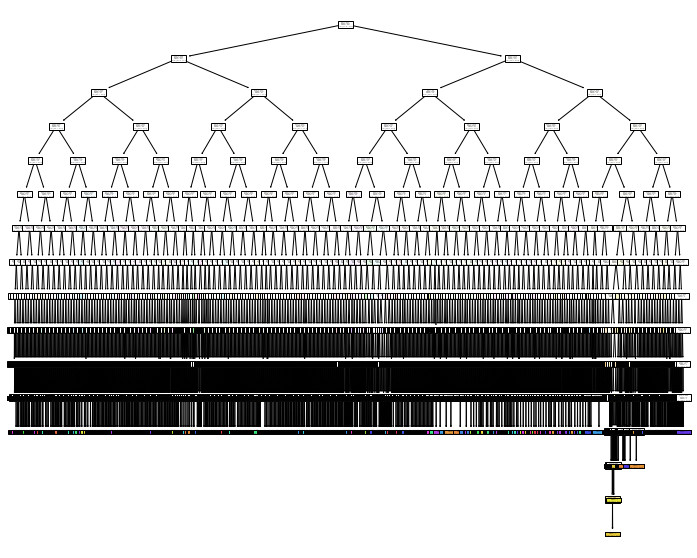

In [150]:
# 6) predict
y_predict = dt.predict(X_test_std)

# Accuracy
# print("training accuracy: ", dt.score(X_train_std,y_train)) 
# print("testing accuracy: ", dt.score(X_test_std,y_test))         

print("accuracy DT train: {:.3f}".format(dt.score(X_train_std, y_train)))
print("accuracy DT test : {:.3f}".format(dt.score(X_test_std, y_test)))

plt.figure(figsize=(12, 10))
plot_tree(dt, filled=True)
plt.show()

### 2) Neural Network Classifier

In [166]:
####################### NN - MLP #########################
#  4) Initialize NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0)

# 5) train
mlp.fit(X_train, y_train)

# 6) predict
y_predict = mlp.predict(X_test)
print("accuracy MLP train :{:.3f}".format(mlp.score(X_train_std, y_train)))
print("accuracy MLP test  :{:.3f}".format(mlp.score(X_test_std, y_test)))

from sklearn.metrics import confusion_matrix
print("Confusion_matrix for X_train\n", confusion_matrix(y_train, mlp.predict(X_train_std)))
print("Confusion_matrix for X_test\n",  confusion_matrix(y_test, mlp.predict(X_test_std)))

accuracy MLP train :0.072
accuracy MLP test  :0.003
Confusion_matrix for X_train
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Confusion_matrix for X_test
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [180]:
vec = sentence_vectorizer('มารดาของปัญญา นิรันดร์กุล คือ')
y_predict = mlp.predict(vec)
y_predict

array([1137])

In [182]:
list(le.inverse_transform([1137]))

['นายเรวัต พุทธินันทน์']

### 3) Random Forest Classifier

In [8]:
######################   RFC  #########################
#  4) Initialize RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15, max_depth=None,
    min_samples_split=2, random_state=0)

# 5) train
rfc.fit(X_train_std, y_train)

# 6) predict
y_predict = rfc.predict(X_test_std)
print("accuracy Random Forest train :{:.3f}".format(rfc.score(X_train_std, y_train)))
print("accuracy Random Forest test  :{:.3f}".format(rfc.score(X_test_std, y_test)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, rfc.predict(X_train_std)))
print(confusion_matrix(y_test, rfc.predict(X_test_std)))

accuracy Random Forest train :0.990
accuracy Random Forest test  :0.978
[[34  0  0]
 [ 0 32  0]
 [ 0  1 38]]
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### ROC plot with roc_curve() function

Unfortunately roc_curve() works with only binary class classification.
For multiclass, please see.... https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(y_test, y_predict)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ValueError: multiclass format is not supported

### Further studies:
1. Other interesting classification techniques can be studied from https://www.kaggle.com/coolman/different-classification-techniques-python
2. Classification of Personal Loan is at https://www.kaggle.com/kiransalavandi/banking-loan-modelling-classification.
3. Classification of credit card fraudulence is at https://www.kaggle.com/mlg-ulb/creditcardfraud/kernels
